#                        SUPERSTORE ANALYSIS AND VISUALIZATION

![](http://www.tiki-international.com/projects/data1/images/superstore2.jpg)

# Table of Contents

1. Libraries
2. Reading and Exploring the Data
3. Exploratory Data Analysis
 * 3.1 Total Orders of Superstore Over Time
 * 3.2 Total Orders Comparison Between 2014 and 2017 (Jan to Dec)
 * 3.3 Main Segment of Superstore's Customer
 * 3.4 Sales and Quantity Performance by Segment
 * 3.5 Total Orders by Region, City and State
 * 3.6 Main Category of Product Ordered
 * 3.7 Top 10 Products Ordered in Superstores
4. Conclusion of the EDA

# 1. Libraries

In [1]:
!pip install xplotter --upgrade

In [2]:
from mpl_toolkits import axes_grid1

In [1]:
# Libraries
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib.ticker as mtick
import random

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

In [2]:
# Below is a list of palletes stored in a variable palette_values. It will be used to visualize the plots we will be plotting below 
palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia','Wistia_r','YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# 2. Reading and Exploring the Data

In [3]:
# Reading Superstore dataset
df_stores=pd.read_csv("dataset.csv", encoding='latin-1', index_col=0)

# Data shape results for Superstore Dataset
print(f'Orders Dataset shape: {df_stores.shape}')
df_stores.head()

Orders Dataset shape: (9994, 20)


Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
4       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

          Customer Name    Segment        Country             City  \
Row ID                                                               
1           Claire Gute   Consumer  United States        Henderson   
2           Claire Gute   Consumer  United States        Henderson   
3       Darrin Van Huff  Corporate  United States      Los Angeles   
4        Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5        Sean O'Donnell   Consumer  United States  Fort Lauderdale   

             State  Postal Code Region       Product ID         Category  \
Row ID                                                                     
1         Kentucky        42420  South  FUR-BO-10001798        Furniture   
2         Kentucky        42420  South  FUR-CH-10000454        Furniture   
3       California        90036   West  OFF-LA-10000240  Office Supplies   
4          Florida        33311  South  FUR-TA-10000577        Furniture   
5          Florida        33311  South  OFF-ST-10000760  Office Supplies   

       Sub-Category                                       Product Name  \
Row ID                                                                   
1         Bookcases                  Bush Somerset Collection Bookcase   
2            Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3            Labels  Self-Adhesive Address Labels for Typewriters b...   
4            Tables      Bretford CR4500 Series Slim Rectangular Table   
5           Storage                     Eldon Fold 'N Roll Cart System   

           Sales  Quantity  Discount    Profit  
Row ID                                          
1       261.9600         2      0.00   41.9136  
2       731.9400         3      0.00  219.5820  
3        14.6200         2      0.00    6.8714  
4       957.5775         5      0.45 -383.0310  
5        22.3680         2      0.20    2.5164

By checking the data shape results, now we know that there are total of 9994 rows with 20 columns in the Superstore Dataset, here's the explanation of the columns:

* Order ID: contains the Unique Order ID for each Customer
* Order Date: contains the Order Date of the product
* Ship Date: contains the Shipping Date of the Product
* Ship Mode: contains the Shipping Mode specified by the Customer
* Customer ID: contains the Unique ID to identify each Customer
* Customer Name: contains the Name of the Customer
* Segment: contains the segment where the Customer belongs
* Country: contains the Country of residence of the Customer
* City: contains the City of residence of of the Customer
* State: contains the State of residence of the Customer
* Postal Code: contains the Postal Code of every Customer
* Region: contains the Region where the Customer belong
* Product ID: contains the Unique ID of the Product
* Category: contains the Category of the product ordered
* Sub-Category: contains the Sub-Category of the product ordered
* Product Name: contains the Name of the Product
* Sale: contains the Sales of the Product
* Quantity: contains the Quantity of the Product
* Discount: contains the Discount provided
* Profit: Profit/Loss incurred

In [4]:
# Inspect the Superstore dataset
print(df_stores.index.is_unique)
print(df_stores.columns.is_unique)
print(df_stores[df_stores.duplicated() == True])

True
True
              Order ID Order Date  Ship Date       Ship Mode Customer ID  \
Row ID                                                                     
3407    US-2014-150119  4/23/2014  4/27/2014  Standard Class    LB-16795   

         Customer Name      Segment        Country      City State  \
Row ID                                                               
3407    Laurel Beltran  Home Office  United States  Columbus  Ohio   

        Postal Code Region       Product ID   Category Sub-Category  \
Row ID                                                                
3407          43229   East  FUR-CH-10002965  Furniture       Chairs   

                                             Product Name    Sales  Quantity  \
Row ID                                                                         
3407    Global Leather Highback Executive Chair with P...  281.372         2   

        Discount   Profit  
Row ID                     
3407         0.3 -12.0588  


In [5]:
df_stores.head(5)

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
4       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

          Customer Name    Segment        Country             City  \
Row ID                                                               
1           Claire Gute   Consumer  United States        Henderson   
2           Claire Gute   Consumer  United States        Henderson   
3       Darrin Van Huff  Corporate  United States      Los Angeles   
4        Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5        Sean O'Donnell   Consumer  United States  Fort Lauderdale   

             State  Postal Code Region       Product ID         Category  \
Row ID                                                                     
1         Kentucky        42420  South  FUR-BO-10001798        Furniture   
2         Kentucky        42420  South  FUR-CH-10000454        Furniture   
3       California        90036   West  OFF-LA-10000240  Office Supplies   
4          Florida        33311  South  FUR-TA-10000577        Furniture   
5          Florida        33311  South  OFF-ST-10000760  Office Supplies   

       Sub-Category                                       Product Name  \
Row ID                                                                   
1         Bookcases                  Bush Somerset Collection Bookcase   
2            Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3            Labels  Self-Adhesive Address Labels for Typewriters b...   
4            Tables      Bretford CR4500 Series Slim Rectangular Table   
5           Storage                     Eldon Fold 'N Roll Cart System   

           Sales  Quantity  Discount    Profit  
Row ID                                          
1       261.9600         2      0.00   41.9136  
2       731.9400         3      0.00  219.5820  
3        14.6200         2      0.00    6.8714  
4       957.5775         5      0.45 -383.0310  
5        22.3680         2      0.20    2.5164

In [6]:
# Drop All Duplicate rows
df_stores = df_stores.drop_duplicates(keep=False)

# Check again if there's still duplicate row
print(df_stores[df_stores.duplicated() == True])

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []


In [7]:
# Check if there's missing values for the Superstore dataset
print(df_stores.isna())

        Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
Row ID                                                            
1          False       False      False      False        False   
2          False       False      False      False        False   
3          False       False      False      False        False   
4          False       False      False      False        False   
5          False       False      False      False        False   
...          ...         ...        ...        ...          ...   
9990       False       False      False      False        False   
9991       False       False      False      False        False   
9992       False       False      False      False        False   
9993       False       False      False      False        False   
9994       False       False      False      False        False   

        Customer Name  Segment  Country   City  State  Postal Code  Region  \
Row ID                                            

As noted as above, there's no missing values for the Superstore dataset, we can now move on to EDA.

# 3. Exploratory Data Analysis

Okay now the dataset is ready to go, let's have our exploratory data analysis and get the data insights from the Superstore dataset. The objective here is to perform a deep dive analysis on columns we have to understand the customer behaviour such as order date by week/month, customer's type (which segment do they mainly belong to), which category of the product is the most popular choice, and also the customer's product preference if they are from different background (country/city) etc.

### 3.1 Average days to ship by Sub-Category

In [10]:
# convert dates to datetime format
df_stores['Order Date'] = pd.to_datetime(df_stores['Order Date'])
df_stores['Ship Date'] = pd.to_datetime(df_stores['Ship Date'])

# create a new column for the number of days between order date and ship date
df_stores['Days to Ship'] = (df_stores['Ship Date'] - df_stores['Order Date']).dt.days

# group by product category and calculate the mean difference in days to ship
avg_days_by_sub_category = df_stores.groupby('Sub-Category')['Days to Ship'].mean()

print(avg_days_by_sub_category)

Sub-Category
Accessories    3.886452
Appliances     3.989270
Art            4.054020
Binders        4.022324
Bookcases      3.811404
Chairs         3.899187
Copiers        3.617647
Envelopes      4.015748
Fasteners      3.976959
Furnishings    3.961338
Labels         4.002747
Machines       3.747826
Paper          3.887591
Phones         4.001125
Storage        3.975177
Supplies       4.015789
Tables         3.893417
Name: Days to Ship, dtype: float64


Text(0, 0.5, 'Sub-Category')

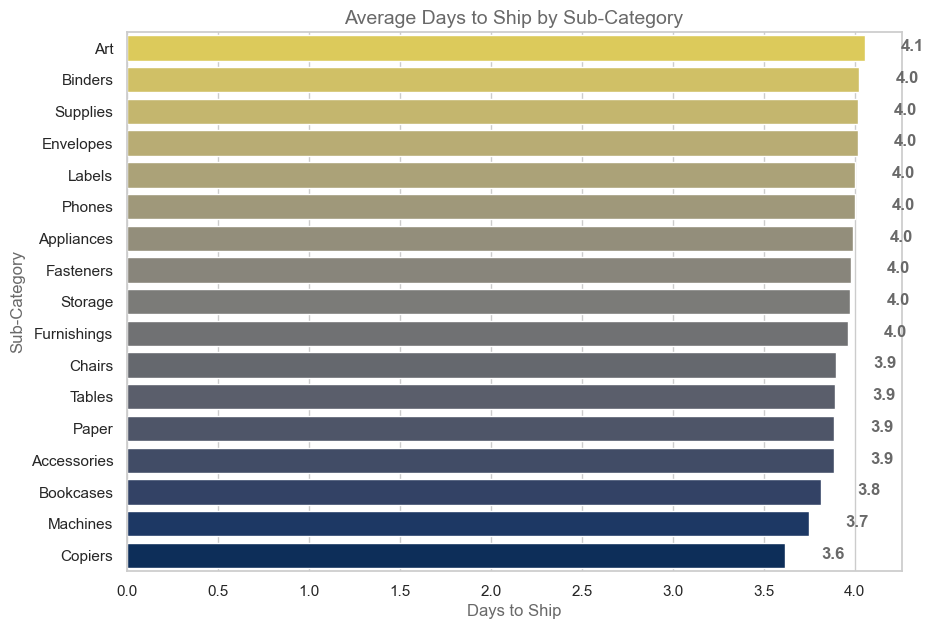

In [356]:
# convert dates to datetime format
df_stores['Order Date'] = pd.to_datetime(df_stores['Order Date'])
df_stores['Ship Date'] = pd.to_datetime(df_stores['Ship Date'])

# create a new column for the number of days between order date and ship date
df_stores['Days to Ship'] = (df_stores['Ship Date'] - df_stores['Order Date']).dt.days

# group by product sub-category and calculate the mean difference in days to ship
avg_days_by_sub_category = df_stores.groupby('Sub-Category')['Days to Ship'].mean().sort_values(ascending=False)

# create a horizontal barplot
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=avg_days_by_sub_category, y=avg_days_by_sub_category.index, palette=random.choice(palette_values))

# add value labels to bars
for i, v in enumerate(avg_days_by_sub_category.values):
    ax.text(v + 0.2, i + 0.1, str(round(v, 1)), color='dimgrey', fontweight='bold')

# set the title and axis labels
ax.set_title('Average Days to Ship by Sub-Category', size=14, color='dimgrey')
ax.set_xlabel('Days to Ship', size=12, color='dimgrey')
ax.set_ylabel('Sub-Category', size=12, color='dimgrey')

Customer satisfaction and value for money should be the important things that stores should focus on. The store can commit to a standard three-day delivery by investing more in the transportation department for products like phones, binders, etc. The store can also equip to a new strategy for same—day delivery or one-day delivery by charging some additional fee over the purchasing cost in order to maximize margin on products which tend to be urgently ordered.

Also, it would help in retaining the customers for the long term.

### 3.2 Store’s Total Sales with respect to Profit by Sub-Category

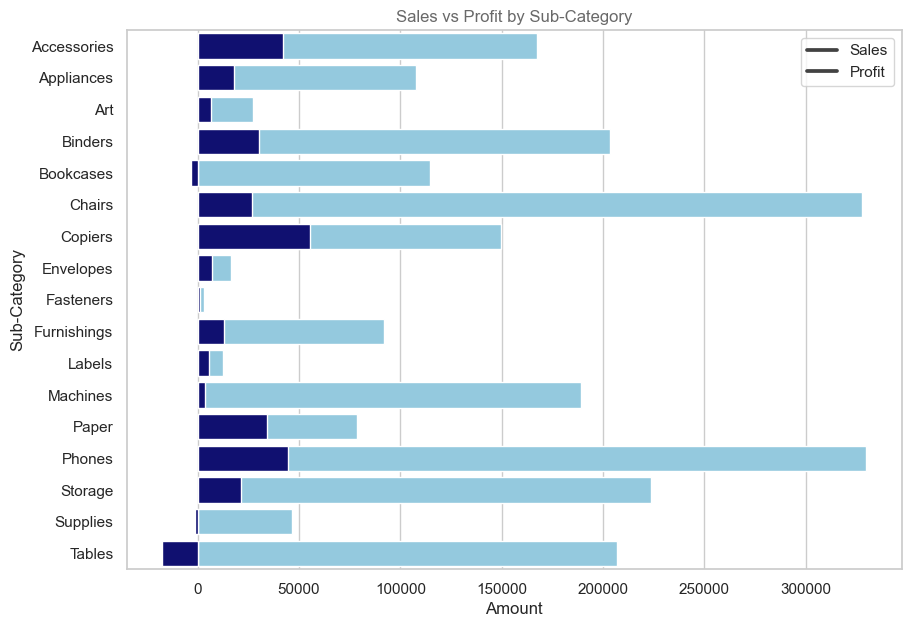

In [148]:
# group by sub-category and calculate the sum of sales and profit
subcat_sales_profit = df_stores.groupby('Sub-Category')['Sales', 'Profit'].sum().reset_index()

# create a bar plot to compare sales and profit of each sub-category
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='Sales', y='Sub-Category', data=subcat_sales_profit, ax=ax, color='skyblue')
sns.barplot(x='Profit', y='Sub-Category', data=subcat_sales_profit, ax=ax, color='navy')
ax.set_xlabel('Amount')
ax.set_ylabel('Sub-Category')
ax.set_title('Sales vs Profit by Sub-Category', size=12, color='dimgrey')
plt.legend(['Sales', 'Profit'])
plt.show()

The goal of the store is profit maximization. This means that losing market share will not affect our motive as much as profit margin. Hence, the store needs a strategy that leads to profit maximization rather than sales maximization.

So, in this graph, we can clearly see that profits from supplies, machines, and fasteners are contributing very less as compared to the sales. Whereas bookcases & tables are going to losses. This means that there is a cost involved in purchasing, transporting, storing & operating these products. Profit can be maximized by reducing our costs. So, the store should eliminate these products from its selling list.

### 3.3 Total Orders of Superstore Over Time

Since our Order Date column is in normal date form, to perform a deep dive analysis on customer's time ordering behaviour, it's advised to break them into small pieces such as year, month, and even the day of week it belongs to for easier data insights to get.

In [8]:
# Changing the data type for date columns
timestamp_cols = ['Order Date']
for col in timestamp_cols:
    df_stores[col] = pd.to_datetime(df_stores[col])
    
# Extracting attributes for Order date - Year and Month
df_stores['order_date_year'] = df_stores['Order Date'].apply(lambda x: x.year)
df_stores['order_date_month'] = df_stores['Order Date'].apply(lambda x: x.month)
df_stores['order_date_month_name'] = df_stores['Order Date'].apply(lambda x: x.strftime('%b'))
df_stores['order_date_year_month'] = df_stores['Order Date'].apply(lambda x: x.strftime('%Y%m'))
df_stores['order_date'] = df_stores['Order Date'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for Order date - Day and Day of Week
df_stores['order_date_day'] = df_stores['Order Date'].apply(lambda x: x.day)
df_stores['order_date_dayofweek'] = df_stores['Order Date'].apply(lambda x: x.dayofweek)
df_stores['order_date_dayofweek_name'] = df_stores['Order Date'].apply(lambda x: x.strftime('%a'))

# New Superstore DataFrame after transformations
df_stores.head()

Order ID Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                      
1       CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
4       US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
5       US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

          Customer Name    Segment        Country             City  \
Row ID                                                               
1           Claire Gute   Consumer  United States        Henderson   
2           Claire Gute   Consumer  United States        Henderson   
3       Darrin Van Huff  Corporate  United States      Los Angeles   
4        Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5        Sean O'Donnell   Consumer  United States  Fort Lauderdale   

             State  ...  Discount    Profit order_date_year order_date_month  \
Row ID              ...                                                        
1         Kentucky  ...      0.00   41.9136            2016               11   
2         Kentucky  ...      0.00  219.5820            2016               11   
3       California  ...      0.00    6.8714            2016                6   
4          Florida  ...      0.45 -383.0310            2015               10   
5          Florida  ...      0.20    2.5164            2015               10   

       order_date_month_name order_date_year_month  order_date  \
Row ID                                                           
1                        Nov                201611    20161108   
2                        Nov                201611    20161108   
3                        Jun                201606    20160612   
4                        Oct                201510    20151011   
5                        Oct                201510    20151011   

        order_date_day  order_date_dayofweek  order_date_dayofweek_name  
Row ID                                                                   
1                    8                     1                        Tue  
2                    8                     1                        Tue  
3                   12                     6                        Sun  
4                   11                     6                        Sun  
5                   11                     6                        Sun  

[5 rows x 28 columns]

Let's plot three graphs to answer following questions:

* Was there any growing trend on Superstore's number of orders?
* Throughout the week, which day of week customers ordered the most from Superstore?
* Which month customers ordered the most from Superstores?

In [54]:
def single_countplot(df, x, ax=None, order=True, hue=None, palette=None, title=None):
    '''
    Plot a countplot with annotations of the count values and percentages for a single variable.

    Parameters:
    df (pandas DataFrame): the dataframe containing the data to be plotted.
    x (str): the column name for the variable to be plotted on the x-axis.
    ax (matplotlib axis, optional): the axis on which to create the plot.
    order (bool or list, optional): if True, order the bars by count values in descending order. 
                                     If a list is provided, order the bars according to the list.
    hue (str, optional): the column name for the variable used for grouping.
    palette (str or sequence, optional): the color palette to use for the plot.
    title (str, optional): the title of the plot.

    Returns:
    ax (matplotlib axis): the axis containing the plot.
    '''

    if ax is None:
        ax = plt.gca()

    # Create the countplot
    if order:
        sns.countplot(data=df, x=x, order=df[x].value_counts().index, hue=hue, palette=palette, ax=ax)
    else:
        sns.countplot(data=df, x=x, hue=hue, palette=palette, ax=ax)

    # Add annotations for count values and percentages
    total_count = df[x].count()
    for p in ax.patches:
        count = p.get_height()
        pct = count / total_count * 100
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height() * 1.02
        ax.text(x_pos, y_pos, f"{count}\n{pct:.1f}%", ha='center')

    # Set x-axis label and y-axis label
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Set plot title
    if title:
        ax.set_title(title, fontsize=14)

    return ax

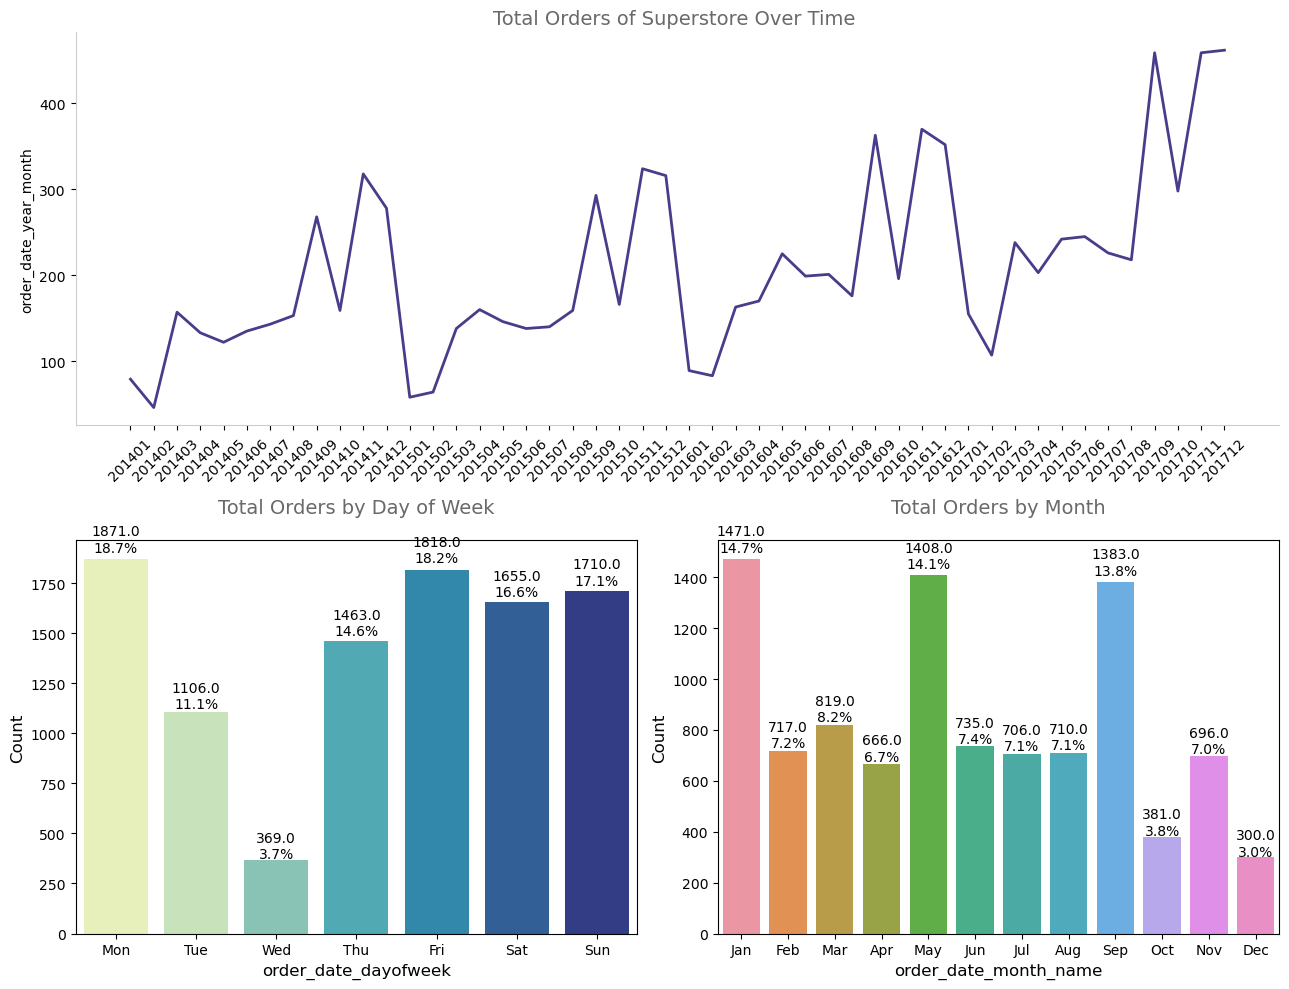

In [55]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Total Orders of Superstore Over Time 
sns.lineplot(data=df_stores['order_date_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)

format_spines(ax1, right_border=False)
  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Total Orders of Superstore Over Time ', size=14, color='dimgrey')

# Barchart - Total Orders by Day of Week
single_countplot(df_stores, x='order_date_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total Orders by Month
single_countplot(df_stores, x='order_date_month_name', ax=ax3, order=False)
monthname_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax3.set_xticklabels(monthname_label)
ax3.set_title('Total Orders by Month', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

From the graphs above, we can observe that:

* Superstore's orders had a growing trend starting from 2014 to 2017, the number of orders were **almost 4 times more in 2017 compared to 2014.**
* In each year, there were **two month spikes** whether customer ordered the most, one was **September**, another one was **November.**
* **Monday** was the day that customers mainly ordered from the Superstore throughout the week.
* **January**, **May**, and **September** were three distinct months that customers ordered the most.

### 3.4 Total Orders by Region, City and State

Let's move on to check the customer segmentation by geographic, firstly let's group the data by region and city.

In [41]:
# Grouping data by Region
df_region = df_stores.groupby(by=['order_date_year_month', 'Region'], as_index=False)
df_region = df_region.agg({'Order ID': 'count', 'Sales': 'sum'}).sort_values(by='order_date_year_month')
df_region.columns = ['order_date_year_month', 'Region', 'Order ID', 'Sales']
df_region.reset_index(drop=True, inplace=True)

# Grouping data by City (Top 10)
df_city_group = df_stores.groupby(by='City', 
                                       as_index=False).count().loc[:, ['City', 'Order ID']]
df_city_group = df_city_group.sort_values(by='Order ID', ascending=False).reset_index(drop=True)
df_city_group = df_city_group.iloc[:10, :]

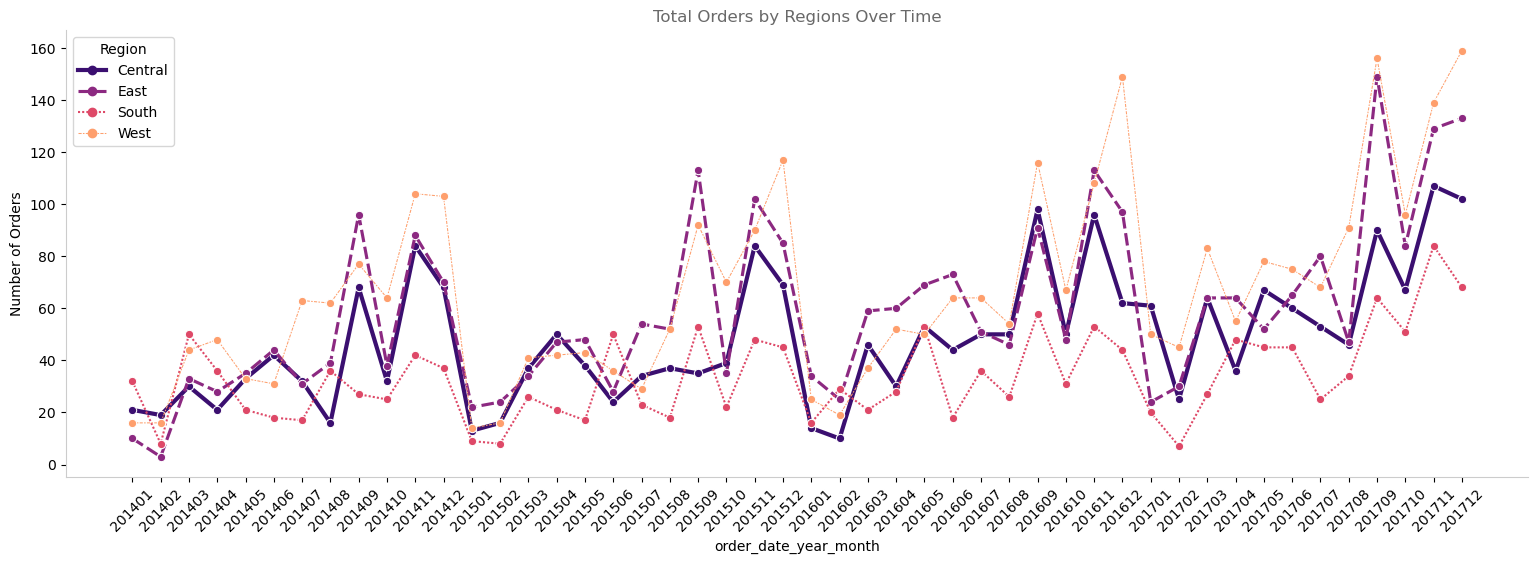

In [59]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(30, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

# Total Orders by Regions Over Time
sns.lineplot(x='order_date_year_month', y='Order ID', ax=ax1, data=df_region, hue='Region', 
             size='Region', style='Region', palette='magma', markers=['o'] * 4)
format_spines(ax1, right_border=False)
ax1.set_title('Total Orders by Regions Over Time', size=12, color='dimgrey')
ax1.set_ylabel('Number of Orders')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

Comparing regional orders are a great way to define the performance of our store. Minor fluctuations which are bi-directional do not matter as much, but seeing all regions’ orders dipping together or rising together might be because of some or the other changes made in the business’s internal or external environment. Tracking downfall in orders like in 201709, we could see how every region did not want to order from us. These patterns are an efficient way to define how we should manage our dos and don'ts.

**West region** represented **the Most Orders** over time from 2014 to 2017.

### 3.5 Top 10 Products Ordered in Superstores

Now we know that customers mainly bought Office Supplies products in Superstores, let's check which were the Top 10 Products Ordered in Superstores.

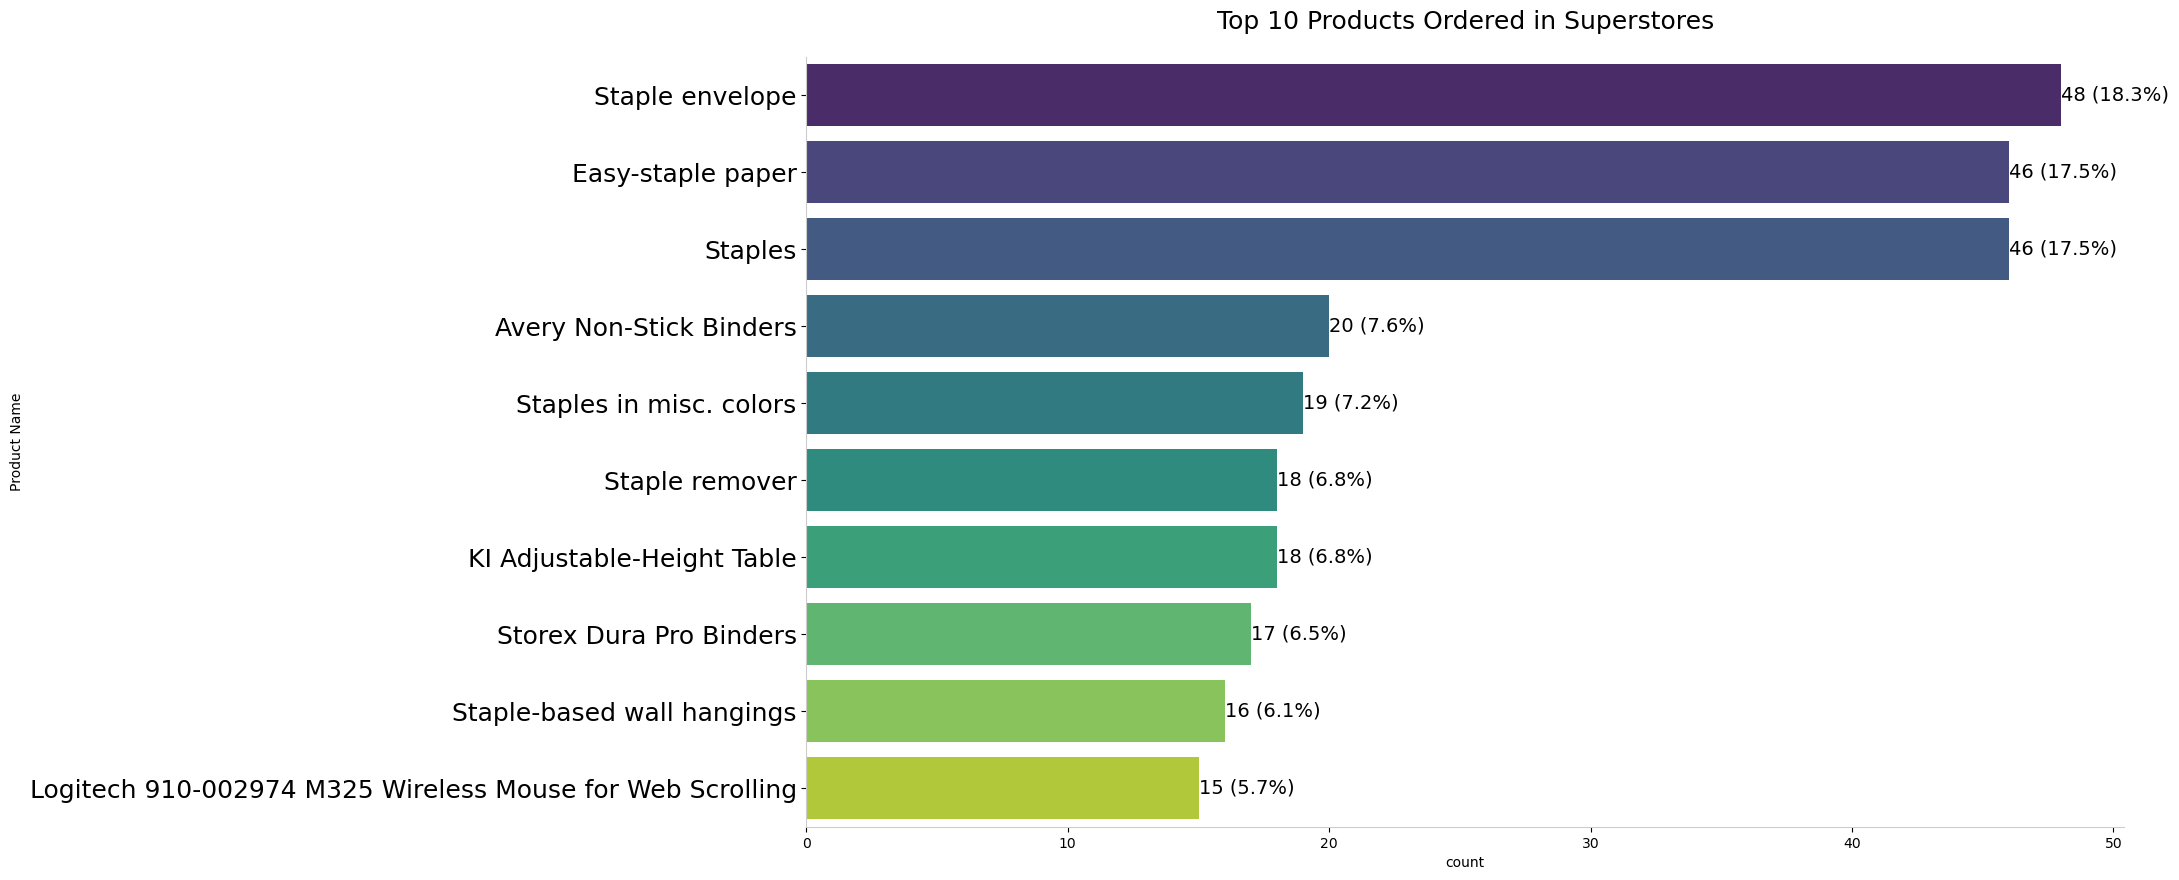

In [23]:
# Top 10 Products Ordered in Superstores
plot_countplot(df=df_stores, col='Product Name', top=10, orient='h', order=True, figsize=(17, 10), palette='viridis',
               title='Top 10 Products Ordered in Superstores', size_title=18)
plt.yticks(fontsize=(18))
plt.show()

From the graphs above, we can observe that:

* The Top 3 Products were: **Staple envelope**, **Easy-staple paper**, and **Staples**.
* Out of the Top 10 Products, it seems that most customers liked to order **Staples related products** from Superstores.

### 3.6 Significant leaders in Sales categorized by State

In [8]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [9]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = df_stores.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('Postal Code',1, inplace = True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

In [10]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, plot_mpl

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

**California, New York, Texas, Washington, and Pennsylvania** are Top 5 States by Total Sales. At the same time, California and New York are leaders with a significant difference in sales compared to the rest of the states.

The company could consider analyzing customer behavior and preferences in these states to tailor their product offerings and pricing strategies to better meet the needs of these specific markets.

### 3.7 Profit-margin by Sub-Category

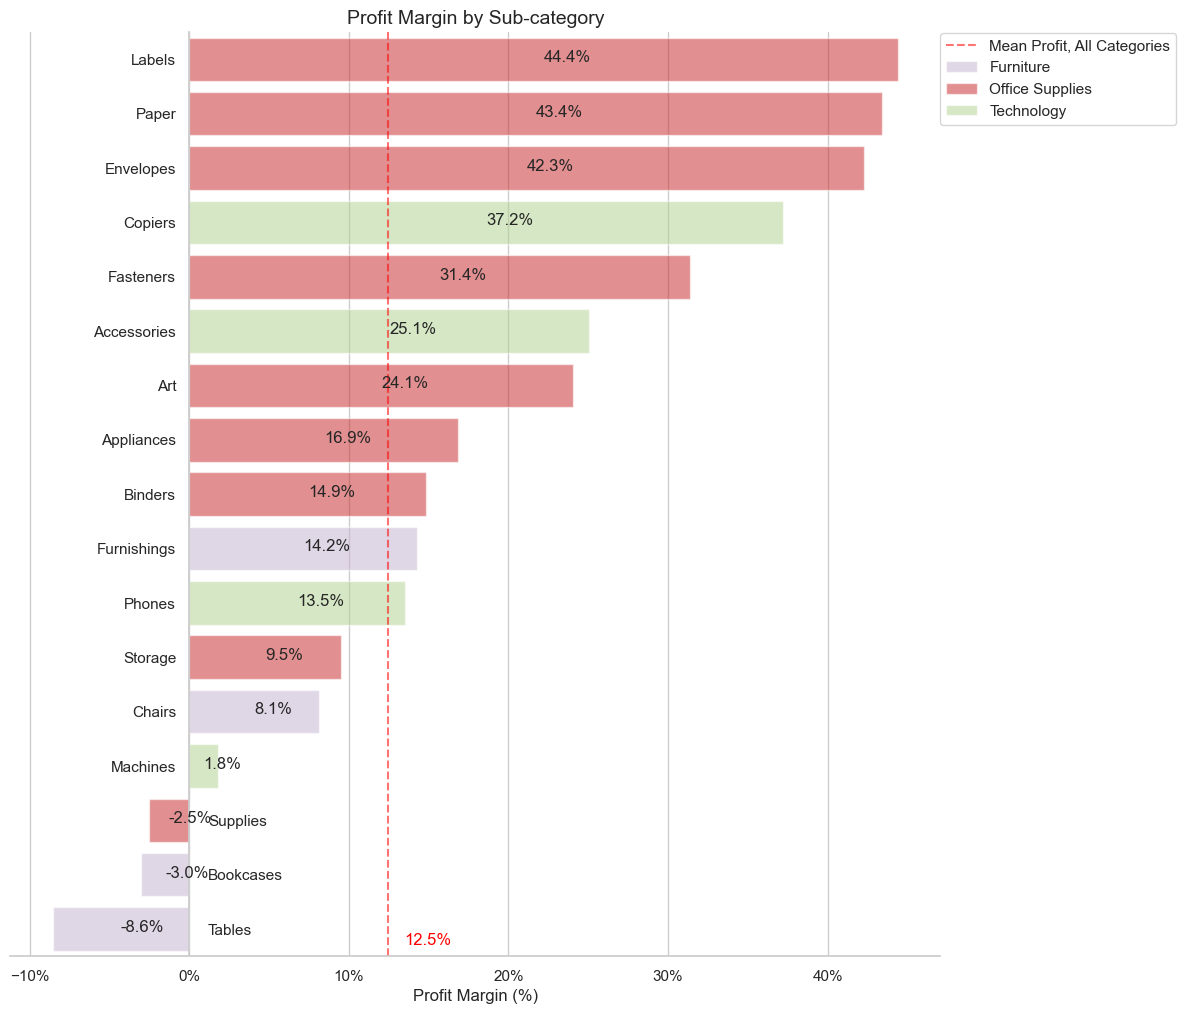

In [143]:
#Grouping the data on category and it's respective sub-categories. Calculating the profit margin.
sales_per_subcategory = df_stores.groupby(["Category", "Sub-Category"], as_index=False)[["Sales", "Profit"]].sum()
sales_per_subcategory["profit_margin"] = sales_per_subcategory["Profit"] / sales_per_subcategory["Sales"]

#Sorting the dataframe based on profit margin
sales_per_subcategory.sort_values(by="profit_margin", inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(12,12))

#Plotting the profit margin per sub-category.
sns.barplot(y=sales_per_subcategory["Sub-Category"], x=sales_per_subcategory["profit_margin"], hue=sales_per_subcategory["Category"], 
            hue_order=["Furniture", "Office Supplies", "Technology"], alpha=0.55, dodge=False,
            palette=random.choice(palette_values), ax=ax)

#Cleaning out bar junk
ax.spines["left"].set_position("zero")
ax.spines[["right","top"]].set_visible(False)
ax.set(ylabel=None, xlabel="Profit Margin (%)")


def move_ylabel_tick(index: list):
    """
    Moving the provided ylabel ticks
    """
    for tick in index:
        ax.get_yticklabels()[tick].set_x(0.02)
        ax.get_yticklabels()[tick].set_horizontalalignment("left")

#Moving the y-labels on sub-categories that are making a loss in order to prevent collision of the bar and the text.
move_ylabel_tick([-1, -2, -3])


#Annotating the profit margin amount for each bar.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f"{p.get_width()*100 :.1f}%", (p.get_width() / 2, y+0.45))
    
#Calculating Superstore's aggregate profit margin in order to compare it to each sub-category's profit margin
mean_profit = sales_per_subcategory["Profit"].sum() / sales_per_subcategory["Sales"].sum()

#Plotting a vertical line and annotating the Superstore's aggregate profit margin.
ax.axvline(mean_profit, color="red", label="Mean Profit, All Categories", alpha=0.55, ls="--")
ax.text(x=mean_profit+0.01, y=len(sales_per_subcategory)-0.7, s=f"{mean_profit*100 :.1f}%", color="red")

#Setting the title and legend.
ax.set_title("Profit Margin by Sub-category", fontdict={"fontsize":14})
ax.legend(loc=(1, 0.9))

#Formatting the x-axis as %
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

The above bar chart shows that most of the sub-categories are running above the average profit margin of 12.5%, which is crucial for the success and sustainability of any business. It ensures that the revenue generated from sales is sufficient to cover the costs of running the business and leave room for profit. In terms of customer retention, a higher profit margin allows businesses to provide better customer service, offer discounts or promotions, and invest in marketing campaigns that could help in retaining existing customers and attracting new ones. Customers are more likely to return to businesses that offer quality products and services, and a higher profit margin enables companies to maintain those standards.

The company has a very high margin (more than double the company’s total margin) on a few of the sub-categories. Mainly within Office Supplies.

Half of Technology’s subcategories also have a high margin. The chart also confirms that the profit margin on the sub-categories within Furniture is low. Two of the sub-categories from Furniture are even being sold at a loss.

### 3.8 Share of Revenue and Profit-margin segregated by different Categories

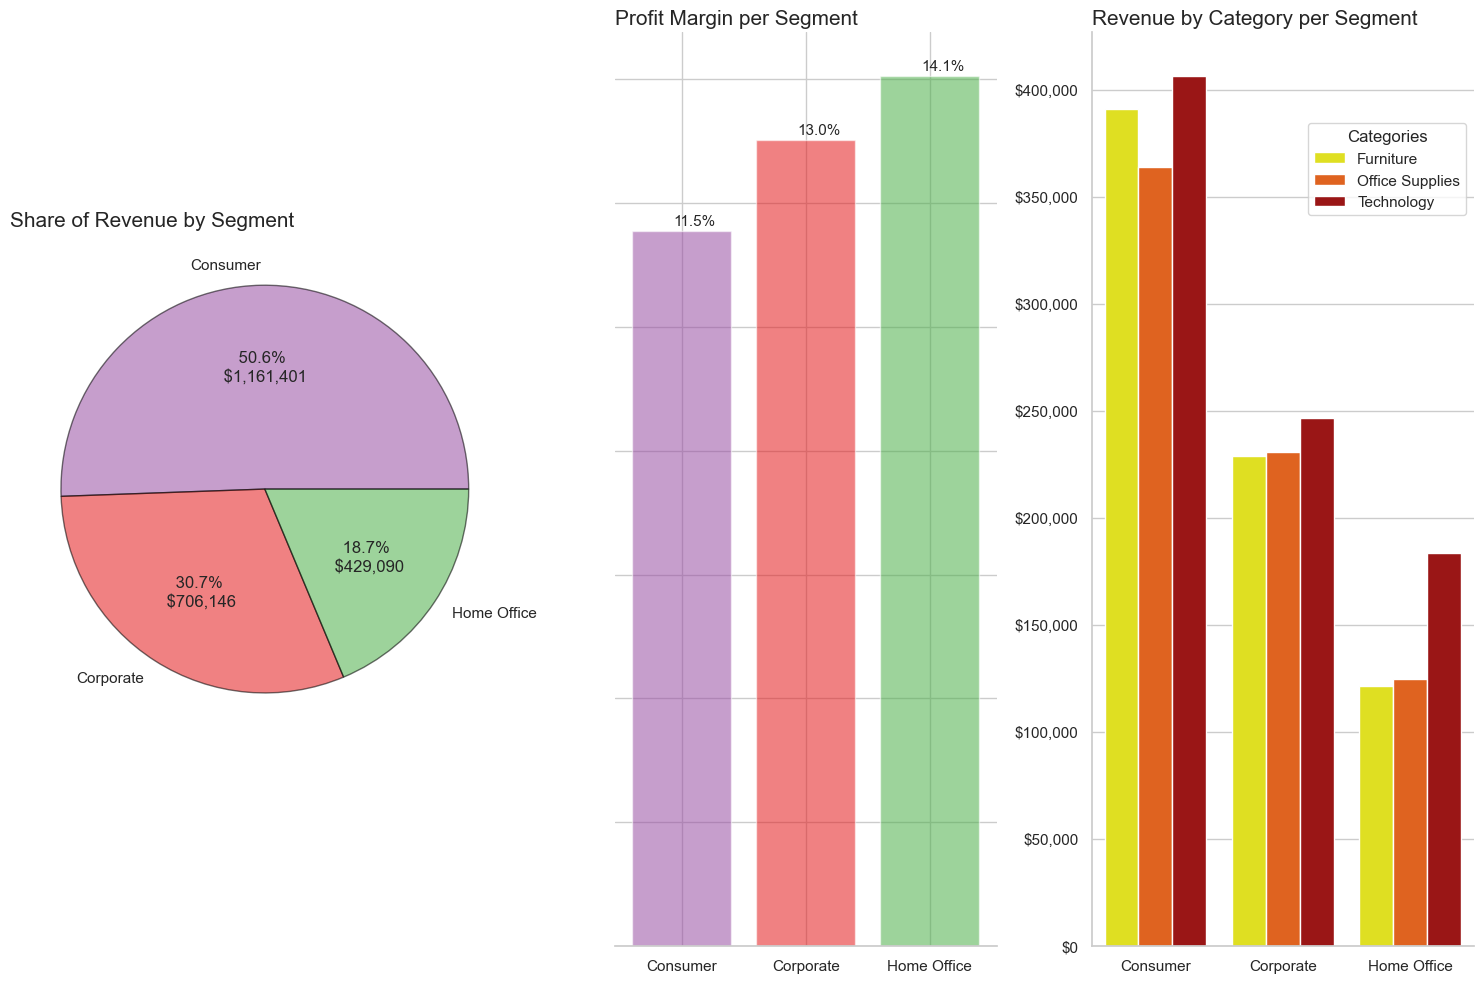

In [288]:
#Grouping by segment and summing the numerical cols.
sales_by_segment = df_stores.groupby("Segment").sum()

#Using this the same colors can be applied for the segments across different charts.
segment_colors = ["#984ea3" if label == "Consumer" else "#e41a1c" if label == "Corporate" else "#4daf4a" for label in sales_by_segment.index]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,10), ncols=3, gridspec_kw={"width_ratios": [1, 0.75, 0.75]})

#Pie chart with % share of revenue and annotating the actual sales value.
ax1.pie(sales_by_segment["Sales"], labels=sales_by_segment.index,
       wedgeprops={"linewidth":1, "edgecolor":"black", "alpha":0.55}, colors=segment_colors,
      autopct=lambda p: f"{p: .1f}% \n ${p*np.sum(sales_by_segment['Sales'])/100 :,.0f}")

#Setting the title for the pie chart
ax1.set_title("Share of Revenue by Segment", fontdict={"fontsize":15}, loc="left")

#Preparing the data for visualization in a bar chart.
sales_by_segment["profit_margin"] = sales_by_segment["Profit"] / sales_by_segment["Sales"]
sales_by_segment = sales_by_segment[["Quantity", "Profit", "profit_margin"]].reset_index()

#Visualizing the profit margin per segment and applying the same coloring as the as pie chart.
ax2.bar(x=sales_by_segment["Segment"], height=sales_by_segment["profit_margin"],
           color=segment_colors, alpha=0.55)

#Removing bar junk
ax2.spines[["left", "top", "right"]].set_visible(False)
ax2.tick_params(left=None, labelleft=None)

#Annotating the bars.
for p in ax2.patches:
    x, _ = p.get_xy()
    
    ax2.annotate(f"{p.get_height()*100 :.1f}%", xy=(x+0.33, p.get_height()+0.001), size=11)

#Setting title for the bar chart.
ax2.set_title("Profit Margin per Segment", fontdict={"fontsize":15}, loc="left")

#Grouping by segment and category.
segment_and_category = df_stores.groupby(["Segment", "Category"], as_index=False).sum()

#Plotting the sales per segment and using the category as hue to show the division of sales between the categories.
sns.barplot(x=segment_and_category["Segment"], y=segment_and_category["Sales"], hue=segment_and_category["Category"], palette = random.choice(palette_values), ax=ax3)

#Removing bar junk.
ax3.spines[["top", "right"]].set_visible(False)
ax3.set_title("Revenue by Category per Segment", fontdict={"fontsize":15}, loc="left")
ax3.set(xlabel=None, ylabel=None)

#Setting the format to USD on the y-axis.
ax3.yaxis.set_major_formatter("${x:,.0f}")

#Legend for the bar chart to show the segments in hue.
ax3.legend(title="Categories", loc="center right", bbox_to_anchor=(1, 0.85))

fig.tight_layout()

Looking at the segments for the Superstore it is apparent that the Consumer segment is contributing the most to sales.

The consumer segment has a bit lower profit margin than the Corporate and Home offices. This is most likely explained by the high volume of sales it’s doing in Furniture, which we saw before has the lowest profit margin out of all the categories of products.

Other than that, another insight is that most of the sales for each segment are within Technology, which on average has a high-profit margin.


### 3.9 Total Orders Comparison Between 2014 and 2017 (Jan to Dec)

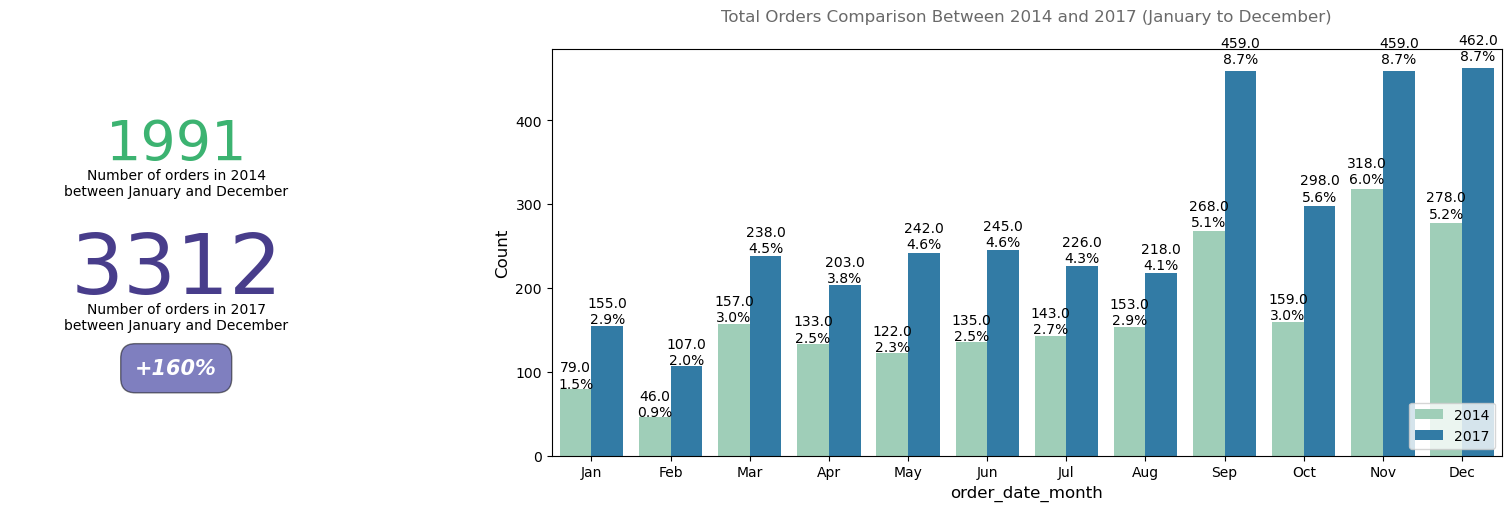

In [28]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on Superstore's orders between 2014 and 2017
df_stores_compare = df_stores.query('order_date_year in (2014, 2017) & order_date_month <=12')
year_orders = df_stores_compare['order_date_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2014] / year_orders[2017]), 0))
ax1.text(0.35, 0.73, f'{year_orders[2014]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.35, 0.64, 'Number of orders in 2014\nbetween January and December', fontsize=10, ha='center')
ax1.text(0.35, 0.40, f'{year_orders[2017]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.35, 0.31, 'Number of orders in 2017\nbetween January and December', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.35, 0.20, f'{signal}{growth}%', fontsize=15, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')


# Bar chart - Comparison between monthly sales between 2014 and 2017
single_countplot(df_stores_compare, x='order_date_month', hue='order_date_year', ax=ax2, order=False,
                 palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2014 and 2017 (January to December)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

From the graph above, we can observe that:

* The total orders of 2017 has grown **over 160%** from 2014's 1991 orders to 2017's 3312 orders.
* **September** and **December** were the months with the **largest growth (3.6% & 3.5%)** compared with other months. It's advised to check which products/customers contributed to this growth in these two months.

# 4. Conclusion of EDA

To conclude, if you are the Superstores owner who is planning to grow the store sales and get a better understanding on the customer behaviour to set up your own sales and marketing strategy, I suggest you should target **Consumer segment customer** as they represented the most sales & quantity of items ordered across all segments. 

According to the EDA, you should be focusing on selling **Staples related products** as most customers ordered these from Superstores. Regarding the marketing and promotion time period, I suggest you should only spend money on ads in **January**, **May** and **September** as we observed these months were the Months with Most Orders. If you want the exact Day of Week, then you should put **ads on Monday** as we observed Monday had the most orders, this will be more effective because your marketing promotion message shows at the perfect time to attract your new customers. 

From a geographical point of view, you should target more on **US West Region**,or States, put more marketing promotion in **California**, **New York**, and **Texas**.

In terms of customer retention, the company should focus on developing a strategy of a two or three-day standard delivery to ship the order. Customers are more likely to return and make repeat purchases from a retailer that provides timely and efficient shipping.

![]("https://media.giphy.com/media/D75xnwlG4gGzu/giphy.gif")

![](https://media.giphy.com/media/D75xnwlG4gGzu/giphy.gif)